In [ ]:
## Leonardo Abreu Santos - 1612734
## Nicolas Paes Leme - 2011050

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
df = pd.read_csv('steam_games.csv')

In [3]:
# steam_user_json = open('byniick_gamelist.json')

In [4]:
# steam_user = json.load(steam_user_json)

In [5]:
df

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [6]:
#conta quantos valores nulo existem em casa coluna
df.isnull().sum()

url                             0
types                           2
name                           16
desc_snippet                13221
recent_reviews              38127
all_reviews                 12363
release_date                 3179
developer                     343
publisher                    5100
popular_tags                 2945
game_details                  520
languages                      36
achievements                28639
genre                         438
game_description             2913
mature_content              37936
minimum_requirements        19764
recommended_requirements    19758
original_price               5311
discount_price              26290
dtype: int64

In [7]:
# Eliminando as colunas desnescessárias
df.drop('desc_snippet', axis=1, inplace=True)
df.drop('release_date', axis=1, inplace=True)
df.drop('mature_content', axis=1, inplace=True)
df.drop('minimum_requirements', axis=1, inplace=True)
df.drop('recommended_requirements', axis=1, inplace=True)
df.drop('achievements', axis=1, inplace=True)

In [8]:
# Dataframe passa a ter 14 colunas
df

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,game_description,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","About This Content Play ""Ghost Division"" by S...",$2.99,NaN
40829,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",$2.99,NaN
40830,https://store.steampowered.com/app/906840/Fant...,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,"SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",About This Content Quests of Doom 4: A Midni...,$7.99,NaN
40831,https://store.steampowered.com/app/906635/Mega...,app,Mega Man X5 Sound Collection,NaN,NaN,"CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,About This Content Get equipped with the stun...,$9.99,NaN


In [9]:
# Elimina jogos com types diferente de 'app'
df = df[df['types'] == 'app']

In [10]:
df = df.dropna(subset=['original_price'])

In [11]:
df = df.dropna(subset=['all_reviews'])

In [12]:
df

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,game_description,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,https://store.steampowered.com/app/454330/A_Ro...,app,A Room Beyond,NaN,"Positive,(11),- 90% of the 11 user reviews for...",René Bühling,"René Bühling,René Bühling","Adventure,Indie,Point & Click","Single-player,Steam Achievements,Steam Trading...","English,German,French,Italian,Spanish - Spain","Adventure,Indie","About This Game A ROOM BEYOND, is fantasy poi...",$7.99,NaN
40708,https://store.steampowered.com/app/847860/Die_...,app,Die In The Dark,NaN,"1 user reviews,- Need more user reviews to gen...",Side B Gaming,"Side B Gaming,Side B Gaming","Adventure,Gore,Indie,Violent,Simulation","Single-player,Profile Features Limited \r\n\t\...",English,"Adventure,Indie,Simulation",About This Game Die in the Dark is a first-pe...,$4.99,NaN
40728,https://store.steampowered.com/app/763990/Chas...,app,Chasing the Stars,NaN,"Mostly Positive,(10),- 70% of the 10 user revi...",Ertal Games,"Ertal Games,Ertal Games","Nudity,Sexual Content,Indie,Steampunk,Story Ri...","Single-player,Steam Achievements,Profile Featu...",English,Indie,About This Game After building some satellite...,$9.99,NaN
40799,https://store.steampowered.com/app/911760/Frui...,app,Fruit Tower Defense,NaN,"4 user reviews,- Need more user reviews to gen...",Fratboy Entertainment,"Fratboy Entertainment,Fratboy Entertainment","Strategy,Adventure,Indie,Casual,Tower Defense","Single-player,Steam Achievements,Profile Featu...",English,"Adventure,Casual,Indie,Strategy",About This Game Fruit Tower Defense is a stra...,$3.99,NaN


In [13]:
total_reviews = np.zeros(df.shape[0])
total_sales = np.zeros(df.shape[0])

In [14]:
df['total_reviews'] = total_reviews

In [15]:
df

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,game_description,original_price,discount_price,total_reviews
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",$19.99,$14.99,0.0
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,$29.99,NaN,0.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,$39.99,NaN,0.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,$44.99,NaN,0.0
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,Free,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,https://store.steampowered.com/app/454330/A_Ro...,app,A Room Beyond,NaN,"Positive,(11),- 90% of the 11 user reviews for...",René Bühling,"René Bühling,René Bühling","Adventure,Indie,Point & Click","Single-player,Steam Achievements,Steam Trading...","English,German,French,Italian,Spanish - Spain","Adventure,Indie","About This Game A ROOM BEYOND, is fantasy poi...",$7.99,NaN,0.0
40708,https://store.steampowered.com/app/847860/Die_...,app,Die In The Dark,NaN,"1 user reviews,- Need more user reviews to gen...",Side B Gaming,"Side B Gaming,Side B Gaming","Adventure,Gore,Indie,Violent,Simulation","Single-player,Profile Features Limited \r\n\t\...",English,"Adventure,Indie,Simulation",About This Game Die in the Dark is a first-pe...,$4.99,NaN,0.0
40728,https://store.steampowered.com/app/763990/Chas...,app,Chasing the Stars,NaN,"Mostly Positive,(10),- 70% of the 10 user revi...",Ertal Games,"Ertal Games,Ertal Games","Nudity,Sexual Content,Indie,Steampunk,Story Ri...","Single-player,Steam Achievements,Profile Featu...",English,Indie,About This Game After building some satellite...,$9.99,NaN,0.0
40799,https://store.steampowered.com/app/911760/Frui...,app,Fruit Tower Defense,NaN,"4 user reviews,- Need more user reviews to gen...",Fratboy Entertainment,"Fratboy Entertainment,Fratboy Entertainment","Strategy,Adventure,Indie,Casual,Tower Defense","Single-player,Steam Achievements,Profile Featu...",English,"Adventure,Casual,Indie,Strategy",About This Game Fruit Tower 

In [16]:
for i, row in df.iterrows():
    original_price = row['original_price']
    discount_price = row['discount_price']
    
    if(type(original_price) != float):
        if '$' in original_price:
            original_price = float(original_price.split('$')[1])
        else:
            original_price = 0.0
    
    if(type(discount_price) != float):
        if '$' in discount_price:
            discount_price = float(discount_price.split('$')[1])
        else:
            discount_price = 0.0
    
    df.at[i,'original_price'] =  original_price
    df.at[i,'discount_price'] =  original_price

In [17]:
df

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,game_description,original_price,discount_price,total_reviews
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",19.99,19.99,0.0
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,29.99,29.99,0.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,39.99,39.99,0.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,44.99,44.99,0.0
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,https://store.steampowered.com/app/454330/A_Ro...,app,A Room Beyond,NaN,"Positive,(11),- 90% of the 11 user reviews for...",René Bühling,"René Bühling,René Bühling","Adventure,Indie,Point & Click","Single-player,Steam Achievements,Steam Trading...","English,German,French,Italian,Spanish - Spain","Adventure,Indie","About This Game A ROOM BEYOND, is fantasy poi...",7.99,7.99,0.0
40708,https://store.steampowered.com/app/847860/Die_...,app,Die In The Dark,NaN,"1 user reviews,- Need more user reviews to gen...",Side B Gaming,"Side B Gaming,Side B Gaming","Adventure,Gore,Indie,Violent,Simulation","Single-player,Profile Features Limited \r\n\t\...",English,"Adventure,Indie,Simulation",About This Game Die in the Dark is a first-pe...,4.99,4.99,0.0
40728,https://store.steampowered.com/app/763990/Chas...,app,Chasing the Stars,NaN,"Mostly Positive,(10),- 70% of the 10 user revi...",Ertal Games,"Ertal Games,Ertal Games","Nudity,Sexual Content,Indie,Steampunk,Story Ri...","Single-player,Steam Achievements,Profile Featu...",English,Indie,About This Game After building some satellite...,9.99,9.99,0.0
40799,https://store.steampowered.com/app/911760/Frui...,app,Fruit Tower Defense,NaN,"4 user reviews,- Need more user reviews to gen...",Fratboy Entertainment,"Fratboy Entertainment,Fratboy Entertainment","Strategy,Adventure,Indie,Casual,Tower Defense","Single-player,Steam Achievements,Profile Featu...",English,"Adventure,Casual,Indie,Strategy",About This Game Fruit Tower 

In [18]:
for i, row in df.iterrows():
    recent_reviews = row['recent_reviews']
    all_reviews = row['all_reviews']
    
    if type(recent_reviews) != float:
        recent_reviews = recent_reviews.split(',')[0]
    
    if type(all_reviews) != float:
        all_reviews_label = all_reviews.split(',')[0]
    
    if all_reviews != '' and 'Need' not in all_reviews:
        total_reviews = int(all_reviews[all_reviews.find('(')+1:all_reviews.find(')')].replace(',',''))
        # Especula-se que para cada review 41 cópias do jogo foram vendidas
        # Como não temos a quantidade de vendas usamos essa métrica
        total_sales = total_reviews * 41
    else:
        total_reviews = 0
        total_sales = 0

    #print(total_reviews)
    
    df.at[i,'recent_reviews'] =  recent_reviews
    df.at[i,'all_reviews'] =  all_reviews_label
    df.at[i,'total_reviews'] =  total_reviews
    df.at[i,'total_sales'] = total_sales

In [19]:
df

,url,types,name,recent_reviews,all_reviews,developer,publisher,popular_tags,game_details,languages,genre,game_description,original_price,discount_price,total_reviews,total_sales
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Very Positive,Very Positive,id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,"About This Game Developed by id software, the...",19.99,19.99,42550.0,1744550.0
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,Mixed,Mixed,PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,29.99,29.99,836608.0,34300928.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Mixed,Mostly Positive,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,39.99,39.99,7030.0,288230.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,Mixed,Mixed,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,44.99,44.99,167115.0,6851715.0
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,Mixed,Mostly Positive,CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,0.0,0.0,11481.0,470721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,https://store.steampowered.com/app/454330/A_Ro...,app,A Room Beyond,NaN,Positive,René Bühling,"René Bühling,René Bühling","Adventure,Indie,Point & Click","Single-player,Steam Achievements,Steam Trading...","English,German,French,Italian,Spanish - Spain","Adventure,Indie","About This Game A ROOM BEYOND, is fantasy poi...",7.99,7.99,11.0,451.0
40708,https://store.steampowered.com/app/847860/Die_...,app,Die In The Dark,NaN,1 user reviews,Side B Gaming,"Side B Gaming,Side B Gaming","Adventure,Gore,Indie,Violent,Simulation","Single-player,Profile Features Limited \r\n\t\...",English,"Adventure,Indie,Simulation",About This Game Die in the Dark is a first-pe...,4.99,4.99,0.0,0.0
40728,https://store.steampowered.com/app/763990/Chas...,app,Chasing the Stars,NaN,Mostly Positive,Ertal Games,"Ertal Games,Ertal Games","Nudity,Sexual Content,Indie,Steampunk,Story Ri...","Single-player,Steam Achievements,Profile Featu...",English,Indie,About This Game After building some satellite...,9.99,9.99,10.0,410.0
40799,https://store.steampowered.com/app/911760/Frui...,app,Fruit Tower Defense,NaN,4 user reviews,Fratboy Entertainment,"Fratboy Entertainment,Fratboy Entertainment","Strategy,Adventure,Indie,Casual,Tower Defense","Single-player,Steam Achievements,Profile Featu...",English,"Adventure,Casual,Indie,Strategy",About This Game Fruit Tower Defense is a stra...,3.99,3.99,0.0,0.0


In [27]:
for i, row in df.iterrows():
    popular_tags = row['popular_tags']
    game_details = row['game_details']
    languages = row['languages']
    genre = row['genre']
    game_description = row['game_description']

    if type(popular_tags) != float and not isinstance(popular_tags,list):
        popular_tags     = popular_tags.split(',')

    if type(game_details) != float and not isinstance(game_details,list):
        game_details     = game_details.split(',')

    if type(languages) != float and not isinstance(languages,list):
        languages        = languages.split(',')

    if type(genre) != float and not isinstance(genre,list):
        genre            = genre.split(',')

    if type(game_description) != float and not isinstance(game_description,list):
        game_description = game_description.split(',')


    df.at[i,'popular_tags'] =  popular_tags
    df.at[i,'game_details'] =  game_details
    df.at[i,'languages'] =  languages
    df.at[i,'genre'] =  genre
    df.at[i,'game_description'] =  game_description

In [ ]:
df

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\nickx\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22826 (\N{CJK UNIFIED IDEOGRAPH-592A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nickx\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21566 (\N{CJK UNIFIED IDEOGRAPH-543E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nickx\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32472 (\N{CJK UNIFIED IDEOGRAPH-7ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nickx\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21367 (\N{CJK UNIFIED IDEOGRAPH-5377}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


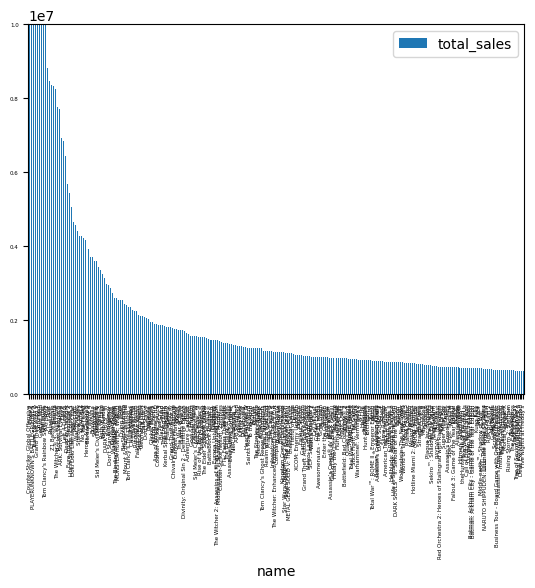

In [23]:
sorted = df.sort_values(by="total_sales", ascending=False).head(n = 250)
sorted.plot(x = "name",y="total_sales",ylim=(0,10000000), kind="bar",fontsize=4)
plt.show()

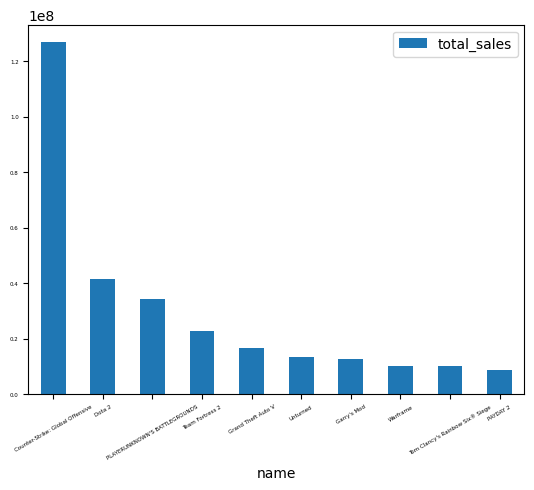

In [24]:
top_10 = df.sort_values(by="total_sales", ascending=False).head(n = 10)
top_10.plot(x="name", y="total_sales", kind="bar", rot=30, fontsize=4)
plt.show()

In [ ]:
top_5 = df.sort_values(by="total_sales", ascending=False).head(n = 10).apply(lambda x: "FPS" in x["popular_tags"])
top_5.plot(x="name", y="total_sales", kind="bar", rot=30, fontsize=4)
plt.show()